In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [60]:
data = pd.read_csv('inputs/clean_data_loan_default_prediction.csv')
data.head()


,Loan Category,Amount,Interest Rate,Tenure(years),Employmet type,Tier of Employment,Work Experience,Total Income(PA),Gender,Married,Dependents,Home,Social Profile,Is_verified,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter
0,Consolidation,0,11.84,6,Salaried,B,1.5,125000.0,Female,Yes,4,rent,No,missing,0,1824.150000,971.46,852.69,0,1
1,Consolidation,0,16.94,4,Self - Employeed,D,10.0,61000.0,Female,No,1,mortgage,missing,Source Verified,0,22912.532998,18000.00,4912.53,0,0
2,Consolidation,0,11.84,6,missing,missing,7.5,100000.0,Other,missing,3,own,No,missing,0,7800.440000,4489.76,3310.68,0,1
3,Credit Card,0,14.71,4,missing,missing,2.5,30000.0,Male,missing,1,rent,Yes,missing,0,6672.050000,5212.29,1459.76,0,0
4,Credit Card,0,14.71,4,missing,missing,10.0,65000.0,Male,missing,3,rent,No,Verified,0,11793.001345,10000.00,1793.00,0,0


Text(0.5, 1.0, 'Correlation Matrix')

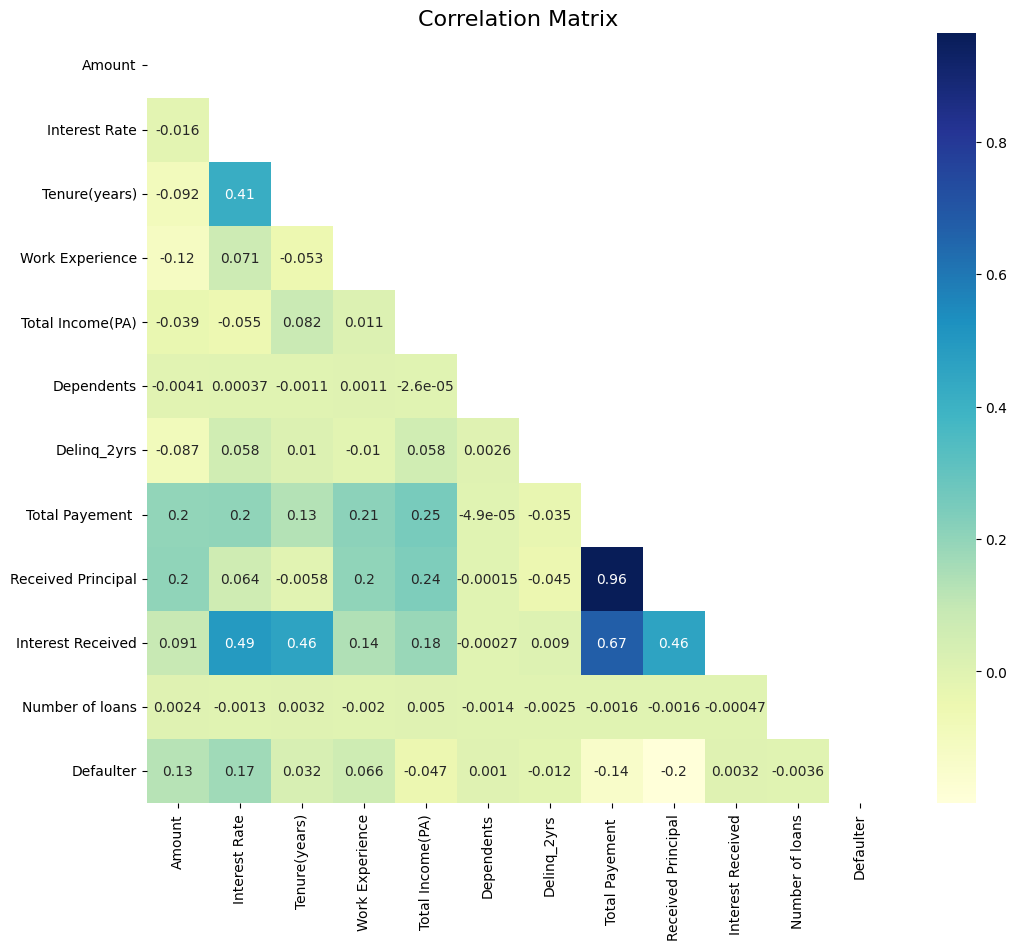

In [61]:
data_final = data[['Amount', 'Interest Rate', 'Tenure(years)', 'Work Experience', 'Total Income(PA)', 'Dependents', 'Delinq_2yrs', 'Total Payement ', 'Received Principal','Interest Received','Number of loans', 'Defaulter']]
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
mask = np.triu(np.ones_like(data_final.corr()))
sns.heatmap(data_final.corr(),cmap="YlGnBu", annot=True, mask=mask)
ax.set_title('Correlation Matrix', fontsize=16)

,Loan Category,Defaulter
0,Business,0.198999
6,Other,0.114196
5,Medical,0.114155
2,Consolidation,0.097866
4,Home,0.091233
1,Car,0.081130
3,Credit Card,0.070476


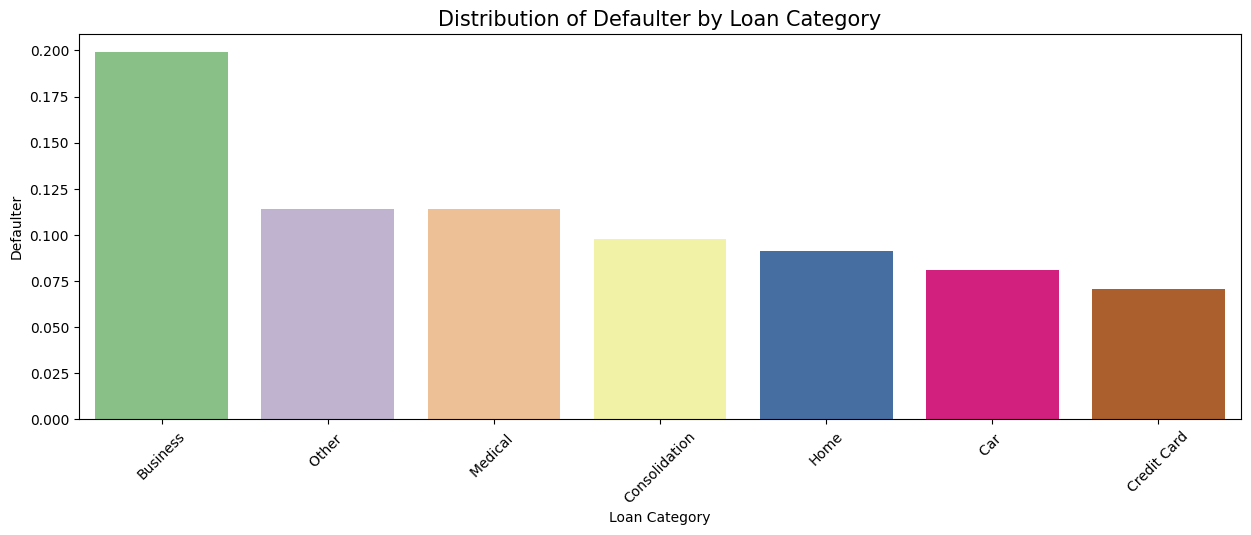

In [62]:
temp = (data.groupby('Loan Category')['Defaulter'].mean()
            .reset_index().sort_values(by='Defaulter',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Loan Category'],y=temp['Defaulter'], palette=("Accent"))
plt.title("Distribution of Defaulter by Loan Category",size=15)
plt.xticks(rotation=45)
plt.show()

In [63]:
# Saving the mapping dict for inference use
loan_category_map = data.groupby('Loan Category')['Defaulter'].mean().to_dict()

import pickle
fileName = 'model/loan_category_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(loan_category_map, f)

loan_category_map

{'Business': 0.19899874843554444,
 'Car ': 0.0811298076923077,
 'Consolidation': 0.09786598427567361,
 'Credit Card': 0.07047619047619047,
 'Home': 0.09123261080556454,
 'Medical ': 0.1141552511415525,
 'Other ': 0.11419579633584355}

In [64]:
data['Defaulter by Loan Category'] =  data.groupby('Loan Category')['Defaulter'].transform('mean')

,Employmet type,Defaulter
1,Self - Employeed,0.146941
0,Salaried,0.092274
2,missing,0.087486


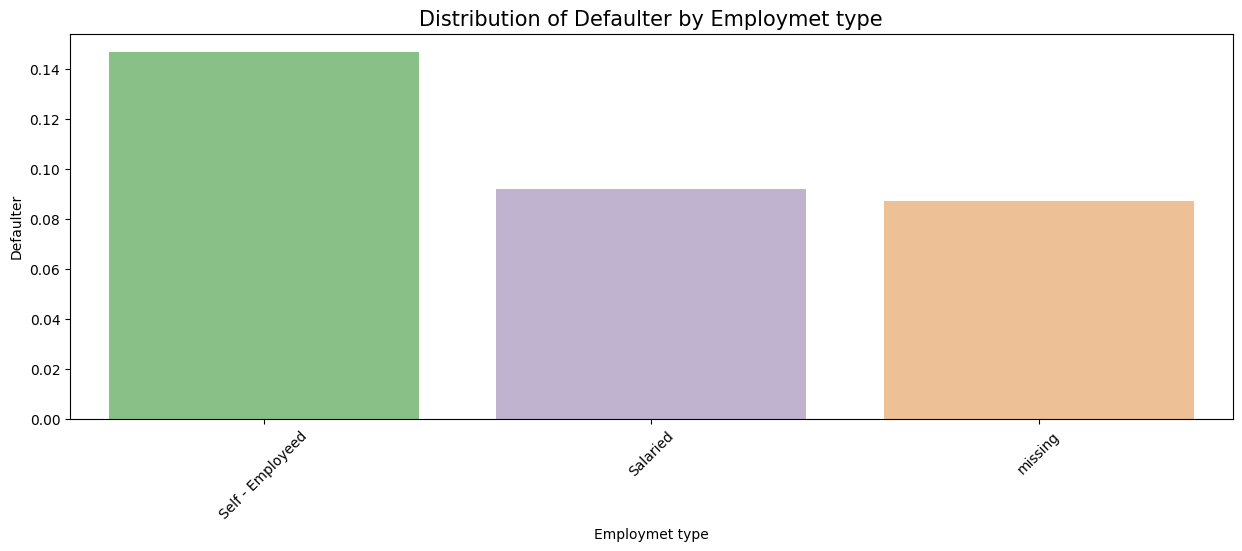

In [65]:
temp = (data.groupby('Employmet type')['Defaulter'].mean()
            .reset_index().sort_values(by='Defaulter',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Employmet type'],y=temp['Defaulter'], palette=("Accent"))
plt.title("Distribution of Defaulter by Employmet type",size=15)
plt.xticks(rotation=45)
plt.show()

In [66]:
# Saving the mapping dict for inference use
employmet_type_map = data.groupby('Employmet type')['Defaulter'].mean().to_dict()

import pickle
fileName = 'model/employmet_type_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(employmet_type_map, f)

employmet_type_map

{'Salaried': 0.09227396116099394,
 'Self - Employeed': 0.14694059848146493,
 'missing': 0.08748611800288272}

In [67]:
data['Defaulter by Employmet type'] =  data.groupby('Employmet type')['Defaulter'].transform('mean')

,Gender,Defaulter
2,Other,0.094764
0,Female,0.093380
1,Male,0.092987


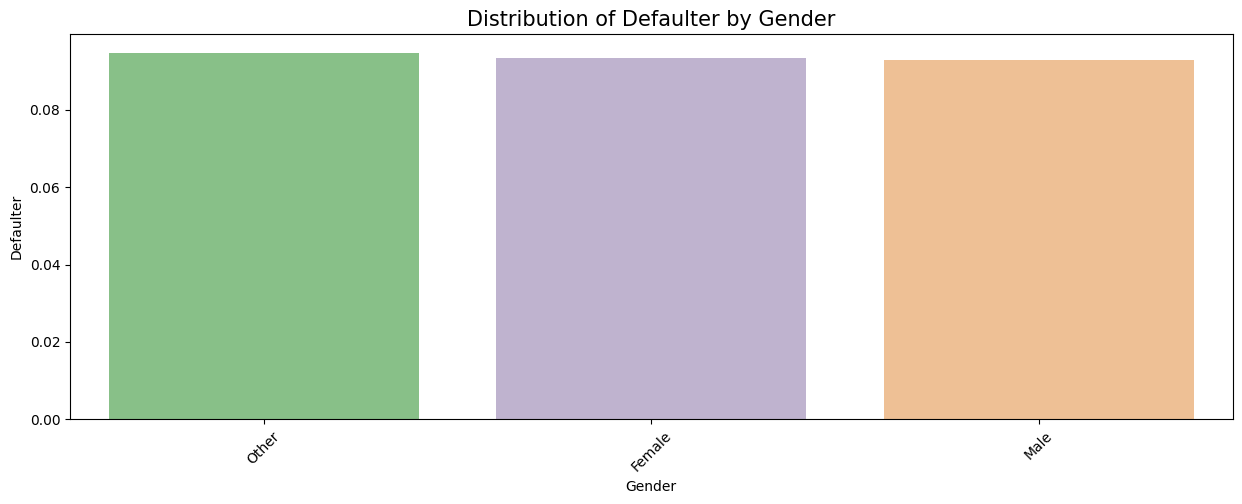

In [68]:
temp = (data.groupby('Gender')['Defaulter'].mean()
            .reset_index().sort_values(by='Defaulter',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Gender'],y=temp['Defaulter'], palette=("Accent"))
plt.title("Distribution of Defaulter by Gender",size=15)
plt.xticks(rotation=45)
plt.show()

In [69]:
### Every gender make same effect on Deafaulter, that's why no need make new feature from gender.

,Home,Defaulter
2,other,0.195652
1,none,0.166667
4,rent,0.106097
3,own,0.090246
0,mortgage,0.083519


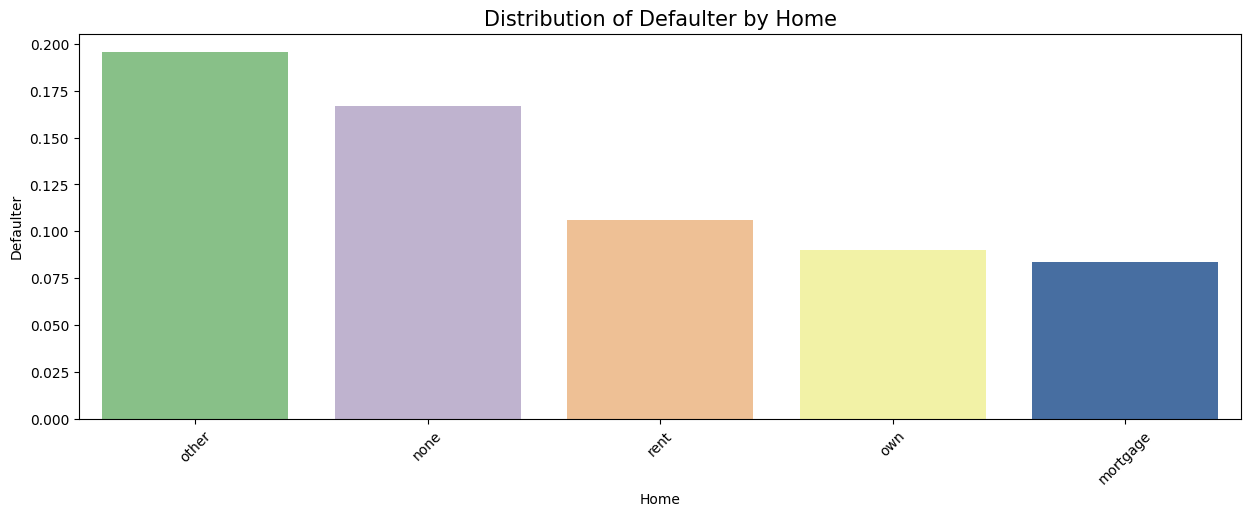

In [70]:

temp = (data.groupby('Home')['Defaulter'].mean()
            .reset_index().sort_values(by='Defaulter',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Home'],y=temp['Defaulter'], palette=("Accent"))
plt.title("Distribution of Defaulter by Home",size=15)
plt.xticks(rotation=45)
plt.show()

In [71]:
# Saving the mapping dict for inference use
home_map = data.groupby('Home')['Defaulter'].mean().to_dict()

import pickle
fileName = 'model/home_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(home_map, f)

home_map

{'mortgage': 0.08351931330472102,
 'none': 0.16666666666666666,
 'other': 0.1956521739130435,
 'own': 0.09024557135254314,
 'rent': 0.10609711814610637}

In [72]:
data['Defaulter by Home'] =  data.groupby('Home')['Defaulter'].transform('mean')

,Married,Defaulter
2,missing,0.093991
1,Yes,0.093576
0,No,0.093569


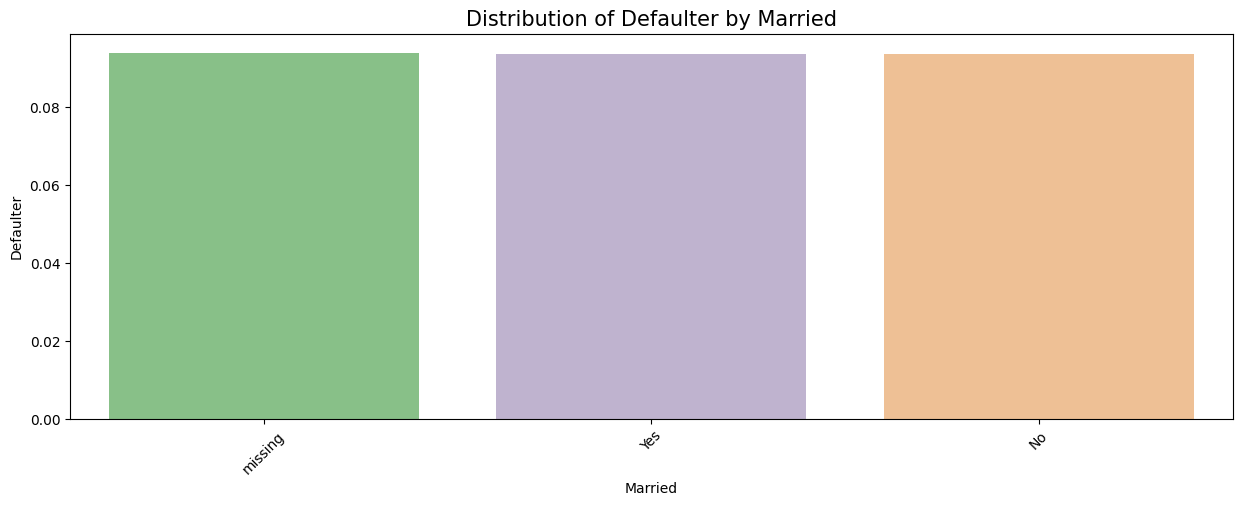

In [73]:
temp = (data.groupby('Married')['Defaulter'].mean()
            .reset_index().sort_values(by='Defaulter',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Married'],y=temp['Defaulter'], palette=("Accent"))
plt.title("Distribution of Defaulter by Married",size=15)
plt.xticks(rotation=45)
plt.show()

In [74]:
### Married and un-married person make same effect on Deafaulter, that's why no need make new feature from married.

,Is_verified,Defaulter
3,missing,0.095327
1,Source Verified,0.094649
0,Not Verified,0.093547
2,Verified,0.091329


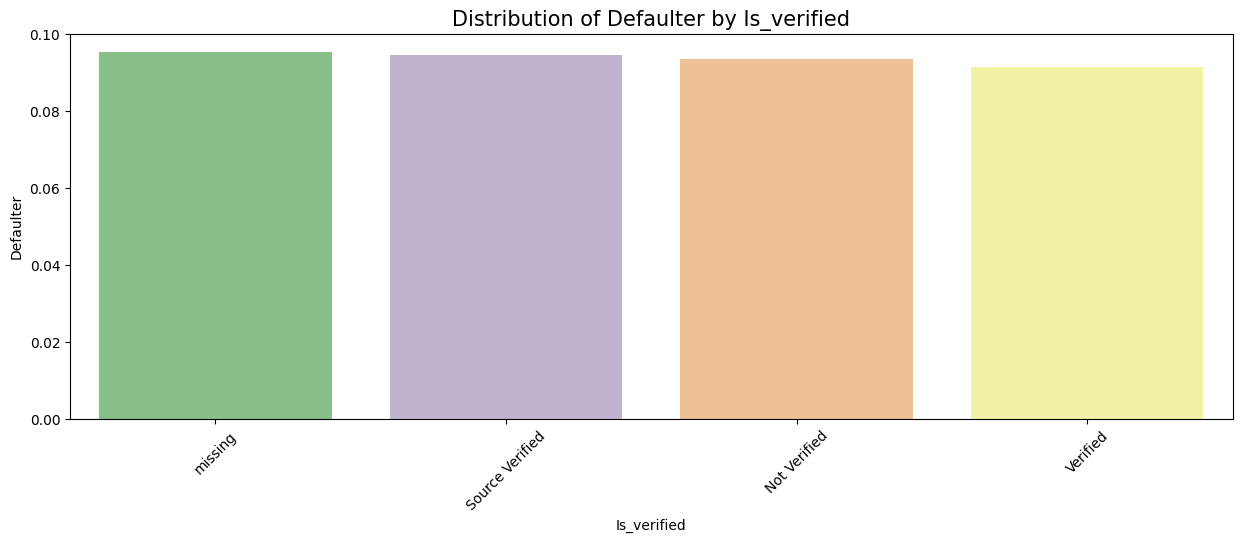

In [75]:
temp = (data.groupby('Is_verified')['Defaulter'].mean()
            .reset_index().sort_values(by='Defaulter',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Is_verified'],y=temp['Defaulter'], palette=("Accent"))
plt.title("Distribution of Defaulter by Is_verified",size=15)
plt.xticks(rotation=45)
plt.show()

In [76]:
# Saving the mapping dict for inference use
Is_verified_map = data.groupby('Is_verified')['Defaulter'].mean().to_dict()

import pickle
fileName = 'model/Is_verified_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(Is_verified_map, f)

Is_verified_map

{'Not Verified': 0.09354713421738889,
 'Source Verified': 0.09464906184850591,
 'Verified': 0.0913294153691892,
 'missing': 0.0953272072172723}

In [77]:
data['Defaulter by Is_verified'] =  data.groupby('Is_verified')['Defaulter'].transform('mean')

In [78]:
data.head()

,Loan Category,Amount,Interest Rate,Tenure(years),Employmet type,Tier of Employment,Work Experience,Total Income(PA),Gender,Married,...,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter,Defaulter by Loan Category,Defaulter by Employmet type,Defaulter by Home,Defaulter by Is_verified
0,Consolidation,0,11.84,6,Salaried,B,1.5,125000.0,Female,Yes,...,0,1824.150000,971.46,852.69,0,1,0.097866,0.092274,0.106097,0.095327
1,Consolidation,0,16.94,4,Self - Employeed,D,10.0,61000.0,Female,No,...,0,22912.532998,18000.00,4912.53,0,0,0.097866,0.146941,0.083519,0.094649
2,Consolidation,0,11.84,6,missing,missing,7.5,100000.0,Other,missing,...,0,7800.440000,4489.76,3310.68,0,1,0.097866,0.087486,0.090246,0.095327
3,Credit Card,0,14.71,4,missing,missing,2.5,30000.0,Male,missing,...,0,6672.050000,5212.29,1459.76,0,0,0.070476,0.087486,0.106097,0.095327
4,Credit Card,0,14.71,4,missing,missing,10.0,65000.0,Male,missing,...,0,11793.001345,10000.00,1793.00,0,0,0.070476,0.087486,0.106097,0.091329


,Social Profile,Defaulter
1,Yes,0.094954
0,No,0.093784
2,missing,0.092402


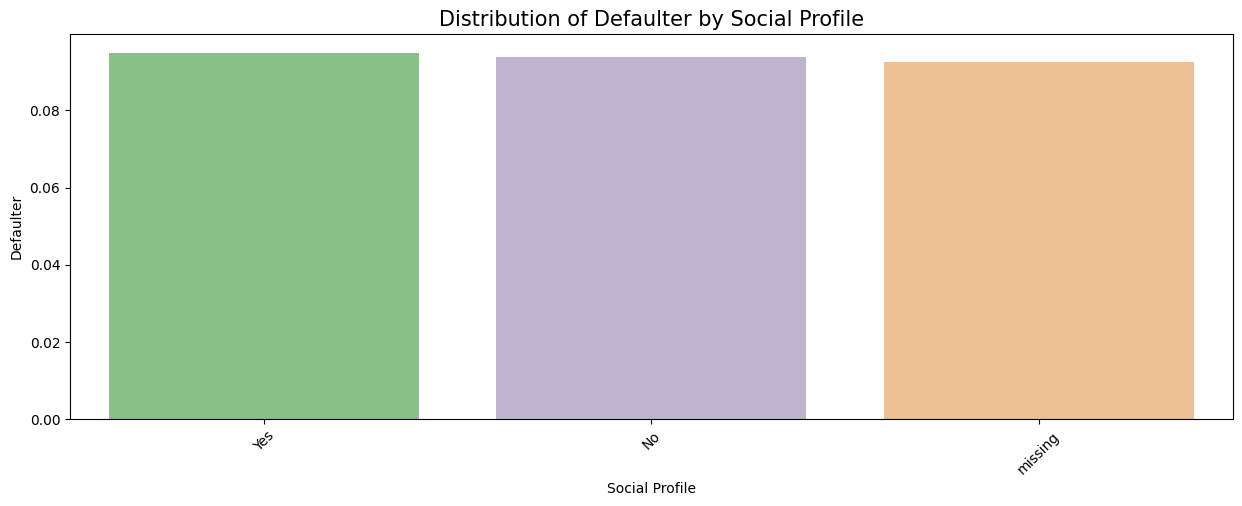

In [79]:

temp = (data.groupby('Social Profile')['Defaulter'].mean()
            .reset_index().sort_values(by='Defaulter',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Social Profile'],y=temp['Defaulter'], palette=("Accent"))
plt.title("Distribution of Defaulter by Social Profile",size=15)
plt.xticks(rotation=45)
plt.show()

In [80]:
data.columns

Index(['Loan Category', 'Amount', 'Interest Rate', 'Tenure(years)',
       'Employmet type', 'Tier of Employment', 'Work Experience',
       'Total Income(PA)', 'Gender', 'Married', 'Dependents', 'Home',
       'Social Profile', 'Is_verified', 'Delinq_2yrs', 'Total Payement ',
       'Received Principal', 'Interest Received', 'Number of loans',
       'Defaulter', 'Defaulter by Loan Category',
       'Defaulter by Employmet type', 'Defaulter by Home',
       'Defaulter by Is_verified'],
      dtype='object')

In [81]:
data.drop(['Loan Category', 'Employmet type', 'Tier of Employment', 'Gender', 'Married', 'Home',	'Social Profile', 'Is_verified'], axis=1, inplace=True)
data.head()

,Amount,Interest Rate,Tenure(years),Work Experience,Total Income(PA),Dependents,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter,Defaulter by Loan Category,Defaulter by Employmet type,Defaulter by Home,Defaulter by Is_verified
0,0,11.84,6,1.5,125000.0,4,0,1824.150000,971.46,852.69,0,1,0.097866,0.092274,0.106097,0.095327
1,0,16.94,4,10.0,61000.0,1,0,22912.532998,18000.00,4912.53,0,0,0.097866,0.146941,0.083519,0.094649
2,0,11.84,6,7.5,100000.0,3,0,7800.440000,4489.76,3310.68,0,1,0.097866,0.087486,0.090246,0.095327
3,0,14.71,4,2.5,30000.0,1,0,6672.050000,5212.29,1459.76,0,0,0.070476,0.087486,0.106097,0.095327
4,0,14.71,4,10.0,65000.0,3,0,11793.001345,10000.00,1793.00,0,0,0.070476,0.087486,0.106097,0.091329


In [84]:
from sklearn.model_selection import train_test_split
X= data.drop(['Defaulter'], axis=1)
y = data['Defaulter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(114981, 15) (114981,)
(28746, 15) (28746,)
